In [1]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [2]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# kernel initialization = glorot_uniform
# optimizer adam, base lr = 0.001

In [53]:
# Build model
def train(n_hidden):
    
    # Early stopping
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    
    # Instantiate model
    model = models.Sequential()
    
    # Input layer + Flatten
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(1024, activation='relu'))
    
    # Hidden layers
    for _ in range(n_hidden):
        model.add(layers.Dense(1024, activation='relu'))
        
    # Output layer
    model.add(layers.Dense(10, activation='softmax'))
    
    model.build()  # Build forces you to provide input shape, but omitting build it still works?
    
    # Compile
    model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training
    history = model.fit(train_images, train_labels, epochs=50,
                        validation_data=(test_images, test_labels),
                        callbacks=[callback])

    # Evaluate
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    
    return model, history

In [63]:
model0, history0 = train(0)

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8936 - accuracy: 0.3303 - val_loss: 1.7075 - val_accuracy: 0.3941
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6852 - accuracy: 0.3984 - val_loss: 1.6178 - val_accuracy: 0.4260
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6148 - accuracy: 0.4229 - val_loss: 1.5968 - val_accuracy: 0.4313
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5674 - accuracy: 0.4427 - val_loss: 1.5616 - val_accuracy: 0.4434
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5399 - accuracy: 0.4507 - val_loss: 1.5723 - val_accuracy: 0.4428
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5188 - accuracy: 0.4593 - val_loss: 1.5251 - val_accuracy: 0.4616
Epoch 7/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4994 - accuracy: 0.4643 - val_loss: 1.5367 - val_

In [64]:
model1, history1 = train(1)

Epoch 1/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8681 - accuracy: 0.3273 - val_loss: 1.6969 - val_accuracy: 0.3890
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6906 - accuracy: 0.3926 - val_loss: 1.6397 - val_accuracy: 0.4171
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6171 - accuracy: 0.4202 - val_loss: 1.5862 - val_accuracy: 0.4349
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5658 - accuracy: 0.4342 - val_loss: 1.5840 - val_accuracy: 0.4365
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5339 - accuracy: 0.4505 - val_loss: 1.5280 - val_accuracy: 0.4566
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5041 - accuracy: 0.4600 - val_loss: 1.5516 - val_accuracy: 0.4456
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4880 - accuracy: 0.4667 - val_loss: 1.5210 -

In [65]:
model2, history2 = train(2)

Epoch 1/50
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8586 - accuracy: 0.3253 - val_loss: 1.7053 - val_accuracy: 0.3904
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6783 - accuracy: 0.3924 - val_loss: 1.6522 - val_accuracy: 0.4040
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5970 - accuracy: 0.4239 - val_loss: 1.5342 - val_accuracy: 0.4543
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5356 - accuracy: 0.4471 - val_loss: 1.5852 - val_accuracy: 0.4369
Epoch 5/50
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4888 - accuracy: 0.4639 - val_loss: 1.5719 - val_accuracy: 0.4349
Epoch 6/50
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4494 - accuracy: 0.4775 - val_loss: 1.5304 - val_accuracy: 0.4575
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4223 - accuracy: 0.4876 - val_loss: 1.6076 -

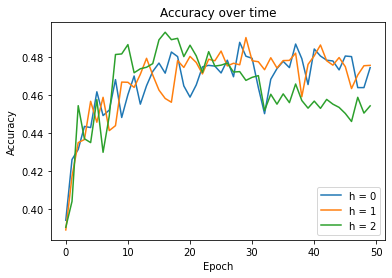

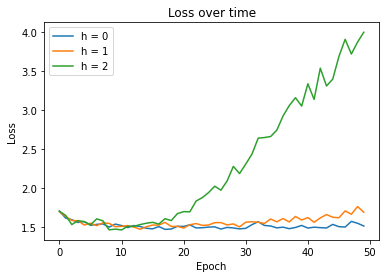

In [66]:
for history in [history0, history1, history2]:
    plt.plot(history.history['val_accuracy'])
    
    plt.title('Accuracy over time')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['h = 0', 'h = 1', 'h = 2'], loc='best')
plt.show()
    
for history in [history0, history1, history2]:
    plt.plot(history.history['val_loss'])
    plt.title('Loss over time')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['h = 0', 'h = 1', 'h = 2'], loc='best')
plt.show()

In [56]:
# Biggest model
big_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='softmax'),
    layers.Dense(4096, activation='softmax'),
    layers.Dense(10, activation='softmax')])

big_model.build()

big_model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history = big_model.fit(train_images, train_labels, epochs=100,  # About 45m for 50 epochs, this should be a bit over 2h
                    validation_data=(test_images, test_labels))

test_loss, test_acc = big_model.evaluate(test_images, test_labels)

Epoch 1/100
1563/1563 [==============================] - 74s 47ms/step - loss: 2.2287 - accuracy: 0.1497 - val_loss: 2.1212 - val_accuracy: 0.1760
Epoch 2/100
1563/1563 [==============================] - 74s 47ms/step - loss: 2.1165 - accuracy: 0.1746 - val_loss: 2.1142 - val_accuracy: 0.1751
Epoch 3/100
1563/1563 [==============================] - 73s 47ms/step - loss: 2.1042 - accuracy: 0.1816 - val_loss: 2.0965 - val_accuracy: 0.1881
Epoch 4/100
1563/1563 [==============================] - 74s 48ms/step - loss: 2.0972 - accuracy: 0.1874 - val_loss: 2.0807 - val_accuracy: 0.1963
Epoch 5/100
1563/1563 [==============================] - 75s 48ms/step - loss: 2.0799 - accuracy: 0.1978 - val_loss: 2.0663 - val_accuracy: 0.2010
Epoch 6/100
1563/1563 [==============================] - 74s 47ms/step - loss: 2.0659 - accuracy: 0.2031 - val_loss: 2.0657 - val_accuracy: 0.2033
Epoch 7/100
1563/1563 [==============================] - 75s 48ms/step - loss: 2.0533 - accuracy: 0.2108 - val_loss: 2

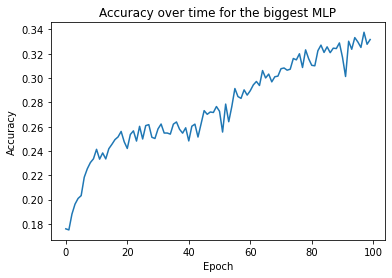

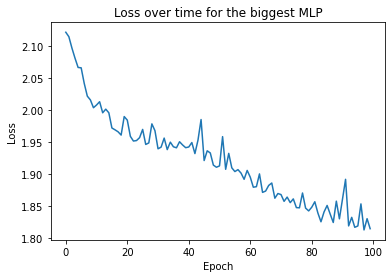

In [57]:
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy over time for the biggest MLP')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Loss over time for the biggest MLP')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

When compared to an MLP with 512 units in a single hidden layer, this network performs worse, as this model only obtains an accuracy of about 0.33 while the MLP discussed in the paper reaches around 52-53% accuracy. The cause for this is unknown, as it is unlikely to be because of overfitting. The validation accuracy didn't increase to much larger than 0.33 and then decrease again, which is the typical overfitting behaviour. An alternative cause could be the final fc layer with 10 units, or other techniques that were not used here such as dropout, data augmentation, and weight decay.

In [58]:
# Save convolutional models for plotting
cnns = []

# Convolutional model
conv2d_relu = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.Flatten(),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(10)])

conv2d_relu.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = conv2d_relu.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = conv2d_relu.evaluate(test_images,  test_labels, verbose=2)

cnns.append(history)

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4885 - accuracy: 0.4581 - val_loss: 1.2333 - val_accuracy: 0.5536
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1320 - accuracy: 0.6011 - val_loss: 1.0670 - val_accuracy: 0.6259
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9749 - accuracy: 0.6551 - val_loss: 0.9821 - val_accuracy: 0.6523
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8799 - accuracy: 0.6899 - val_loss: 0.9166 - val_accuracy: 0.6812
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8075 - accuracy: 0.7160 - val_loss: 0.9041 - val_accuracy: 0.6877
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7435 - accuracy: 0.7379 - val_loss: 0.8895 - val_accuracy: 0.6869
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6932 - accuracy: 0.7556 - val_loss: 0.8473 -

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.4162 - accuracy: 0.4973 - val_loss: 1.2435 - val_accuracy: 0.5613
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1475 - accuracy: 0.5964 - val_loss: 1.1591 - val_accuracy: 0.5965
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0435 - accuracy: 0.6372 - val_loss: 1.1144 - val_accuracy: 0.6144
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9782 - accuracy: 0.6584 - val_loss: 1.0190 - val_accuracy: 0.6454
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9282 - accuracy: 0.6769 - val_loss: 1.0331 - val_accuracy: 0.6465
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8759 - accuracy: 0.6941 - val_loss: 1.0325 - val_accuracy: 0.6471
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8327 - accuracy: 0.7105 - val_loss: 1.0354 -

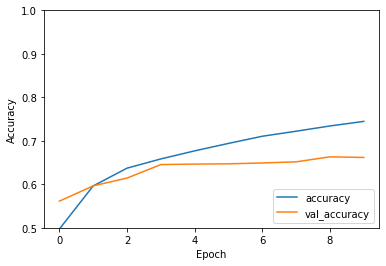

In [59]:
# tanh activation layers
conv2d_tanh = models.Sequential([layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='tanh'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='tanh'),
                            layers.Flatten(),
                            layers.Dense(64, activation='tanh'),
                            layers.Dense(10)])

conv2d_tanh.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = conv2d_tanh.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = conv2d_tanh.evaluate(test_images,  test_labels, verbose=2)

cnns.append(history)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8562 - accuracy: 0.3343 - val_loss: 1.6263 - val_accuracy: 0.4248
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5419 - accuracy: 0.4547 - val_loss: 1.4945 - val_accuracy: 0.4738
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3917 - accuracy: 0.5095 - val_loss: 1.3279 - val_accuracy: 0.5231
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2911 - accuracy: 0.5466 - val_loss: 1.2726 - val_accuracy: 0.5475
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2121 - accuracy: 0.5757 - val_loss: 1.2078 - val_accuracy: 0.5769
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1437 - accuracy: 0.6002 - val_loss: 1.1286 - val_accuracy: 0.6019
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0861 - accuracy: 0.6226 - val_loss: 1.0849 -

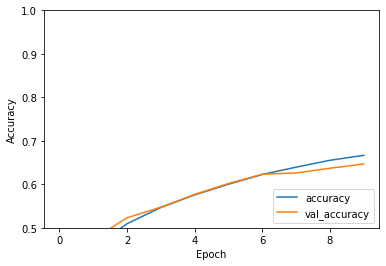

In [60]:
# New optimizer
conv2d_sgd = models.Sequential([layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='tanh'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='tanh'),
                            layers.Flatten(),
                            layers.Dense(64, activation='tanh'),
                            layers.Dense(10)])

conv2d_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = conv2d_sgd.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = conv2d_sgd.evaluate(test_images,  test_labels, verbose=2)

cnns.append(history)

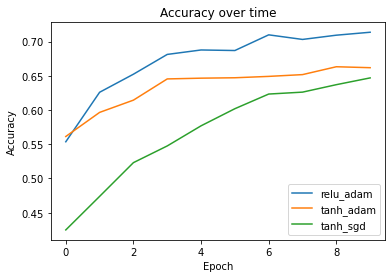

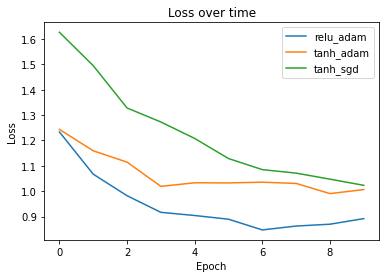

In [61]:
for history in cnns:
    plt.plot(history.history['val_accuracy'])
    
    plt.title('Accuracy over time')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['relu_adam', 'tanh_adam', 'tanh_sgd'], loc='best')
plt.show()
    
for history in cnns:
    plt.plot(history.history['val_loss'])
    plt.title('Loss over time')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['relu_adam', 'tanh_adam', 'tanh_sgd'], loc='best')
plt.show()

Here we can see that the tanh activation functions causes both the accuracy and loss to fluctuate with larger amplitude. While the final accuracy for the tanh function is higher, the loss is also slightly higher. 

Using the SGD optimizer instead of the Adam one stabilizes the performance, making sure both the loss and accuracy don't fluctuate as much. On top of that, the loss is lower than both of the Adam-optimized networks, and the accuracy is as high as the peaks of the CNN with tanh activation funcitons.

Since the CNN uses 7 layers and a flatten layer, we will use an MLP with 1 input layer, 5 hidden layers, and 1 output layer (and of course the flatten layer)

In [54]:
history = train(5)

Epoch 1/50
1563/1563 [==============================] - 38s 24ms/step - loss: 2.0011 - accuracy: 0.2332 - val_loss: 1.8683 - val_accuracy: 0.2889
Epoch 2/50
1563/1563 [==============================] - 37s 23ms/step - loss: 1.8503 - accuracy: 0.3019 - val_loss: 1.7765 - val_accuracy: 0.3381
Epoch 3/50
1563/1563 [==============================] - 35s 23ms/step - loss: 1.7783 - accuracy: 0.3407 - val_loss: 1.7359 - val_accuracy: 0.3636
Epoch 4/50
1563/1563 [==============================] - 35s 23ms/step - loss: 1.7270 - accuracy: 0.3673 - val_loss: 1.6799 - val_accuracy: 0.3870
Epoch 5/50
1563/1563 [==============================] - 35s 23ms/step - loss: 1.6878 - accuracy: 0.3838 - val_loss: 1.6545 - val_accuracy: 0.3993
Epoch 6/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6566 - accuracy: 0.4019 - val_loss: 1.6178 - val_accuracy: 0.4150
Epoch 7/50
1563/1563 [==============================] - 35s 23ms/step - loss: 1.6238 - accuracy: 0.4151 - val_loss: 1.6267 -